# Economia informal

In [2]:
import math
import os
import warnings

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from datetime import datetime
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [7]:
cens=pd.read_csv("conjunto_de_datos_iter_00CSV20.csv")

/tmp/ipykernel_150773/3819683342.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  cens=pd.read_csv("conjunto_de_datos_iter_00CSV20.csv")


In [6]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [7]:
cens = cens[(cens['LOC'] == 0) & (cens['MUN'] >= 1) & (cens['ENTIDAD'] >= 1)]

In [8]:
vari=['MUN', 'NOM_ENT',  'NOM_MUN',"P15PRI_IN", "P15SEC_IN", "POCUPADA", "PSINDER","P15YM_AN", "GRAPROES", "VPH_3YMASC", "VPH_DSADMA", "VPH_AUTOM", "VPH_MOTO"]

In [9]:
df=cens[vari]
df.set_index('MUN', inplace=True)

In [10]:
df=df[df["NOM_ENT"]=="Ciudad de México"]

In [11]:
varb=["P15PRI_IN", "P15SEC_IN", "POCUPADA", "PSINDER","P15YM_AN", "GRAPROES", "VPH_3YMASC", "VPH_DSADMA", "VPH_AUTOM", "VPH_MOTO"]

In [12]:
df1=df[varb]

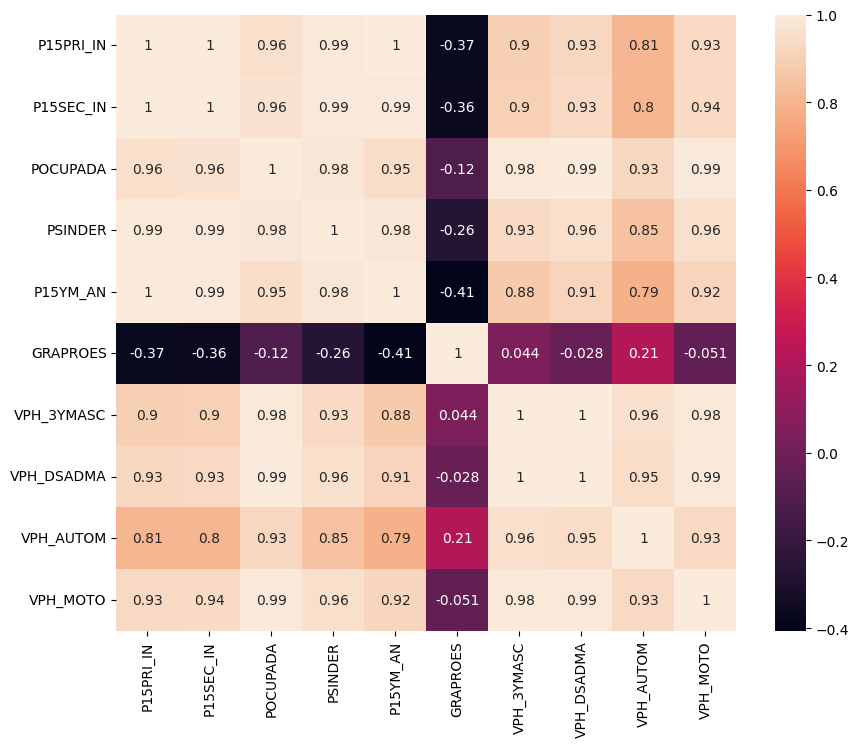

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [14]:
pipe = make_pipeline(
        StandardScaler(), # Estandarización previa de los datos para estar en la misma escala
        PCA())            # Análisis de Componentes Principales con todos los componentes

pipe.fit(df1)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [16]:
pca = pipe.named_steps['pca']

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = explained_variance_ratio.cumsum()

# Determinar el número de componentes necesarios para explicar al menos el 90% de la varianza
n_components = (cumulative_variance <= 0.90).sum() + 1

# Crear un DataFrame con los ratios de varianza explicada
ve = pd.DataFrame(
    data    = (explained_variance_ratio[:n_components] * 100).round(2),
    columns = ['variance_ratio'],
    index   = [f'PC{i+1}' for i in range(n_components)]
)

# Imprimir el DataFrame y la varianza acumulada
print(ve)
print('========================')
print('Varianza acumulada', ve.variance_ratio.sum())

     variance_ratio
PC1           85.51
PC2           13.56
Varianza acumulada 99.07000000000001


In [17]:
pipe.named_steps['pca'].components_[1, :] *= -1

# Crear un DataFrame con los componentes principales
tr = pd.DataFrame(
    data=pipe.named_steps['pca'].components_[0:2, :],
    columns=df1.columns,
    index=['PC1', 'PC2']
).T

# Mostrar el DataFrame resultante
print(tr)

                 PC1       PC2
P15PRI_IN   0.333694  0.179735
P15SEC_IN   0.334012  0.172536
POCUPADA    0.341110 -0.053063
PSINDER     0.338320  0.083527
P15YM_AN    0.330754  0.207357
GRAPROES   -0.060320 -0.842021
VPH_3YMASC  0.331591 -0.192895
VPH_DSADMA  0.337170 -0.130472
VPH_AUTOM   0.310202 -0.332269
VPH_MOTO    0.336704 -0.107259


In [18]:
components = pipe.transform(df1)

In [19]:
df_pca=pd.DataFrame(components).iloc[:, :2]

In [20]:
df_pca.columns=["PC1", "PC2"]

In [21]:
df_pca = df_pca.reset_index(drop=True)
df = df.reset_index(drop=True)

df_pca['Entidad'] = df['NOM_ENT']
df_pca["MUN"]=df["NOM_MUN"]


In [22]:
df_pca = df_pca.reset_index(drop=True)

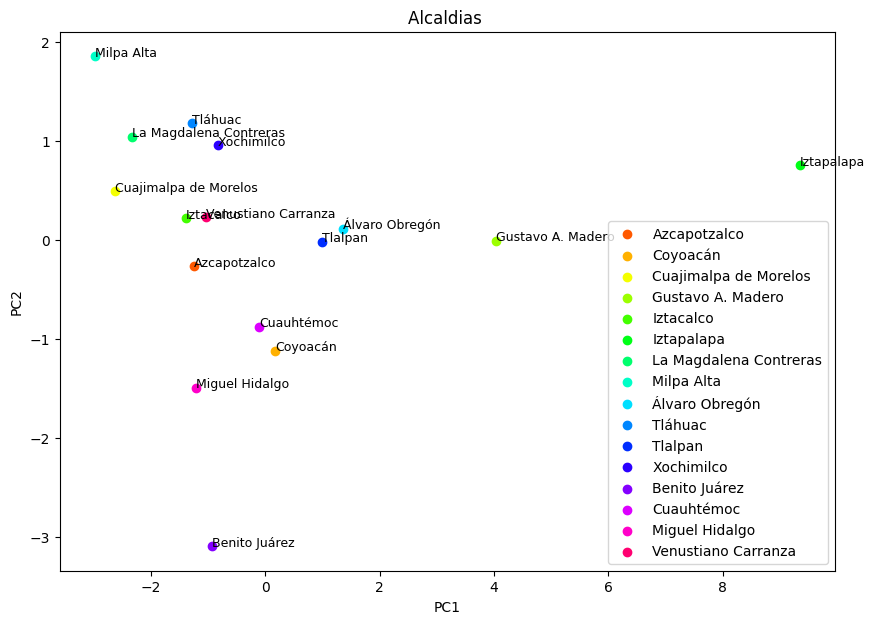

In [23]:
# Crear un diccionario de colores para cada entidad
entidades_unicas = df_pca['MUN'].unique()
colores = sns.color_palette("hsv", len(entidades_unicas))
color_dict = {entidad: colores[i] for i, entidad in enumerate(entidades_unicas)}

# Visualizar los resultados
plt.figure(figsize=(10, 7))

# Graficar los puntos con colores específicos por entidad
for entidad in entidades_unicas:
    subset = df_pca[df_pca['MUN'] == entidad]
    plt.scatter(subset['PC1'], subset['PC2'], c=[color_dict[entidad]], label=entidad)

# Añadir nombres de las entidades en el gráfico
for i, entidad in enumerate(df_pca['MUN']):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], entidad, fontsize=9)

# Etiquetas y título
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Alcaldias ')

# Mostrar la leyenda con las entidades y sus colores
plt.legend(title='')
plt.show()

In [24]:
import pandas as pd

# Convertir numpy.ndarray a DataFrame
components_df = pd.DataFrame(components)

# Renombrar las columnas
dfi = components_df.rename(columns={0: 'Indice de economia informal'}).iloc[:, :1]



In [25]:
combined_df = pd.concat([df[['NOM_ENT','NOM_MUN']], dfi[['Indice de economia informal']]], axis=1)

In [26]:
cdmx = combined_df[combined_df['NOM_ENT'] == 'Ciudad de México']
cdmx

,NOM_ENT,NOM_MUN,Indice de economia informal
0,Ciudad de México,Azcapotzalco,-1.239982
1,Ciudad de México,Coyoacán,0.176878
2,Ciudad de México,Cuajimalpa de Morelos,-2.619817
3,Ciudad de México,Gustavo A. Madero,4.033528
4,Ciudad de México,Iztacalco,-1.387891
5,Ciudad de México,Iztapalapa,9.345509
6,Ciudad de México,La Magdalena Contreras,-2.324067
7,Ciudad de México,Milpa Alta,-2.975587
8,Ciudad de México,Álvaro Obregón,1.368687
9,Ciudad de México,Tláhuac,-1.274965


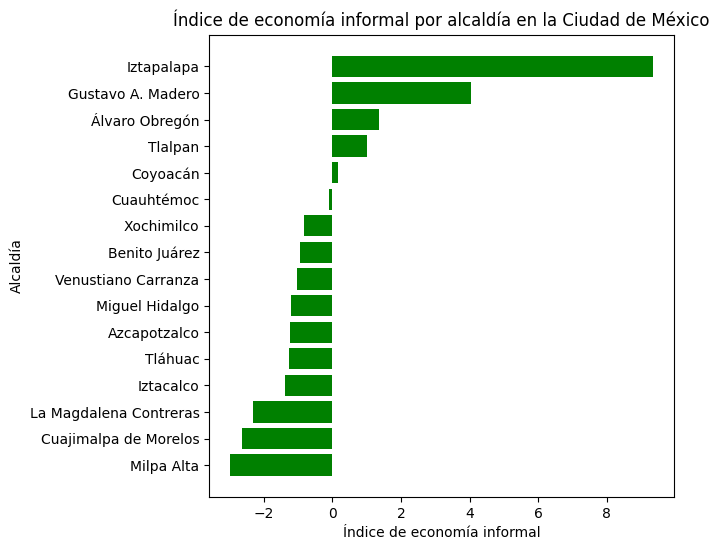

In [27]:
cdmx = cdmx.sort_values(by='Indice de economia informal', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(6, 6))
plt.barh(cdmx['NOM_MUN'], cdmx['Indice de economia informal'], color="green")
plt.xlabel('Índice de economía informal')
plt.ylabel('Alcaldía')
plt.title('Índice de economía informal por alcaldía en la Ciudad de México')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el municipio con mayor marginalidad esté arriba
plt.show()


# Ansestría

In [8]:
ans=pd.read_excel("Ancestria.xlsx")

In [20]:
ans.groupby("POP")["POP"].value_counts()

POP
CEU     95
MEZ    543
NAT     38
Name: count, dtype: int64

In [9]:
anss=ans.dropna()

In [4]:
anss

,FOLIO,POP,AIM1,AIM2,AIM3,AIM4,AIM5,AIM6,AIM7,AIM8,...,AIM23,AIM24,AIM25,AIM26,AIM27,AIM28,AIM29,AIM30,AIM31,AIM32
0,14430,MEZ,1,0,2,0,1,2,1,1,...,2,1,0,1.0,0,0,2,0,1,1
1,15106,MEZ,1,0,1,0,2,0,1,1,...,2,1,0,0.0,1,1,2,1,0,0
2,15459,MEZ,0,0,0,0,0,0,0,0,...,0,2,0,0.0,0,1,0,0,0,1
3,15895,MEZ,0,0,0,0,0,0,0,1,...,1,1,0,0.0,0,0,0,0,0,2
4,16586,MEZ,1,0,0,0,2,0,1,0,...,1,0,0,1.0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,NA12872,CEU,1,2,1,2,2,2,2,2,...,2,0,2,2.0,2,2,2,2,2,0
672,NA12873,CEU,2,2,2,2,2,2,2,2,...,2,0,2,2.0,2,2,2,2,2,0
673,NA12874,CEU,0,2,2,2,1,2,2,2,...,2,0,2,1.0,2,2,1,2,2,0
674,NA12889,CEU,2,2,2,2,2,2,2,2,...,2,0,2,2.0,2,2,2,2,2,0


In [5]:
vrb=anss.drop(columns=["FOLIO", "POP"])

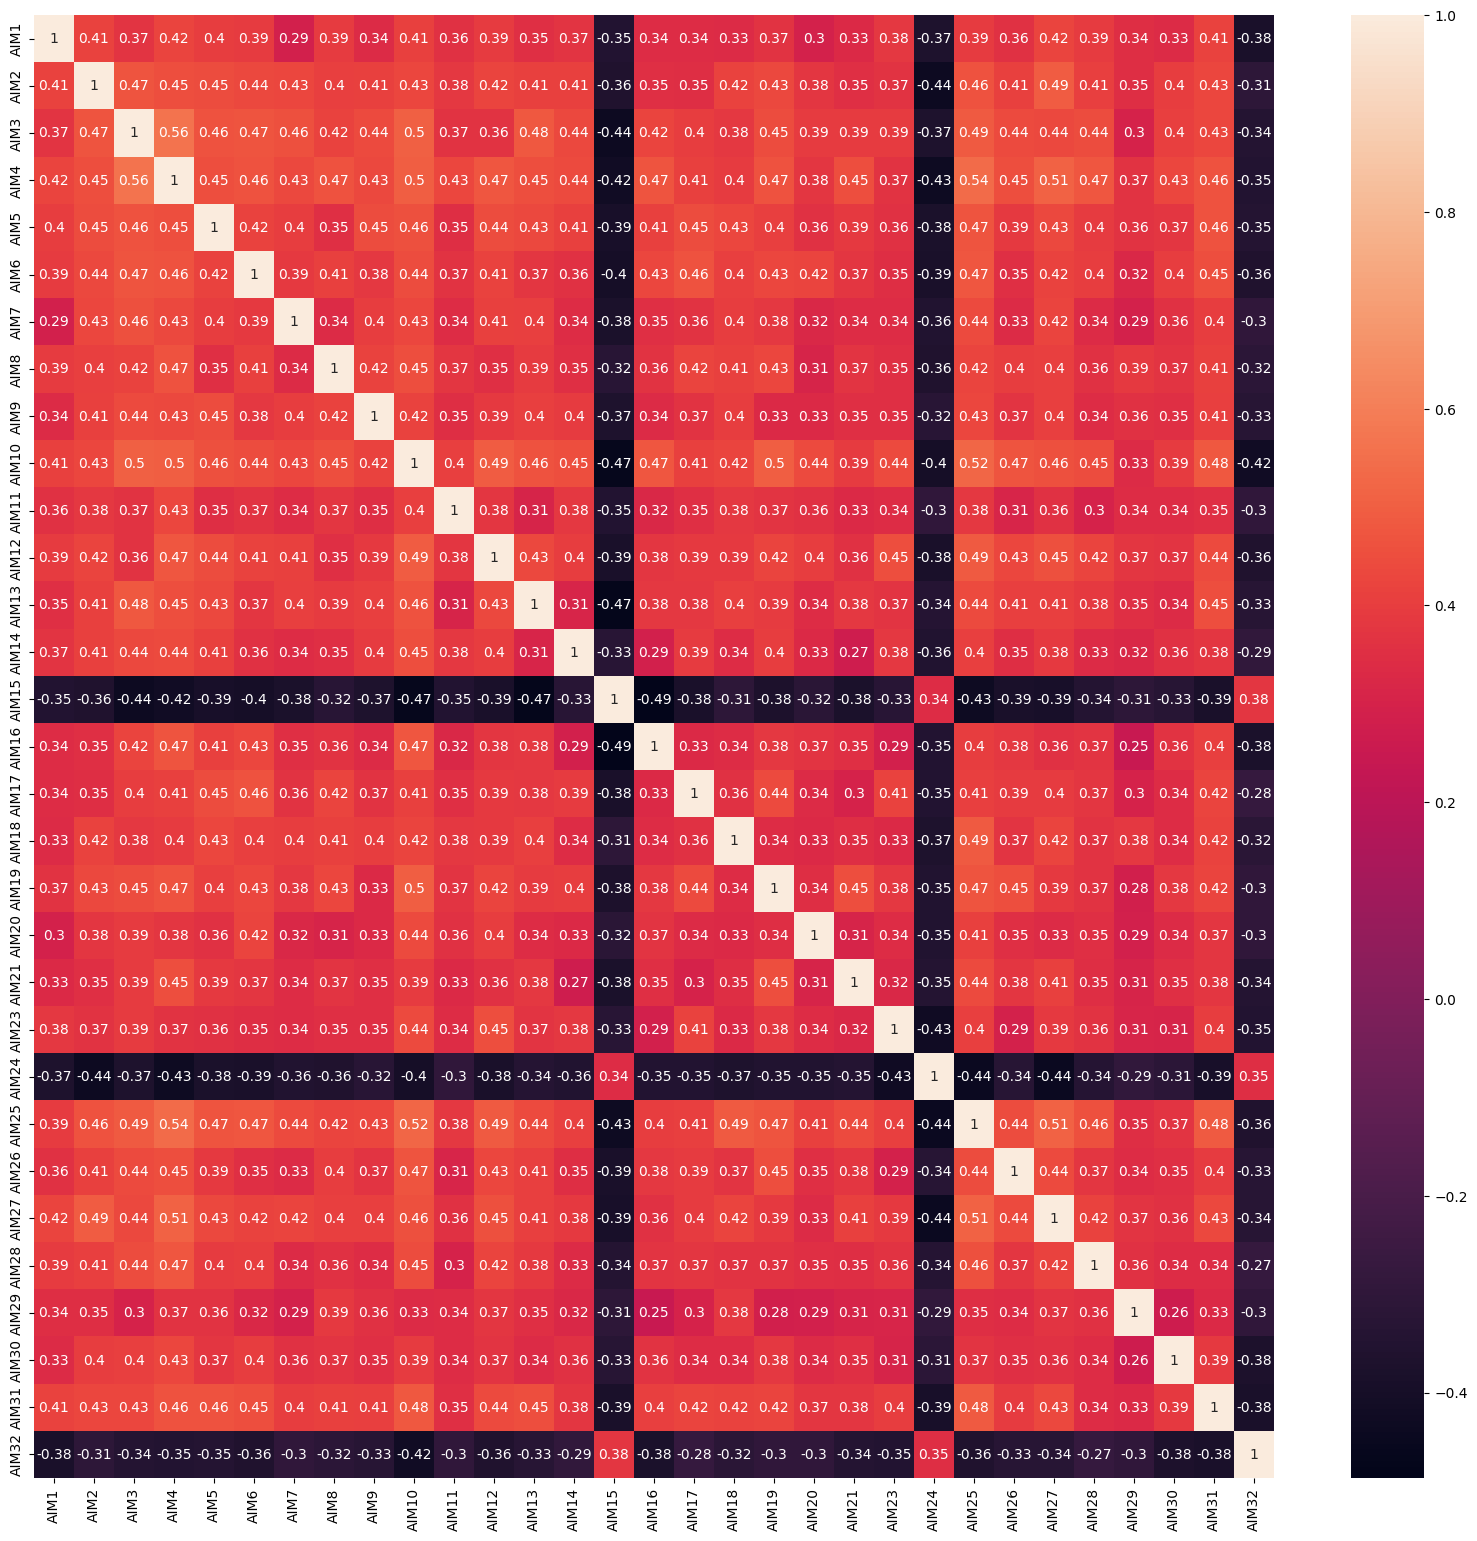

In [6]:
plt.figure(figsize=(20,19))
sns.heatmap(vrb.corr(),annot=True)
plt.show()

In [7]:
pipe = make_pipeline(
        StandardScaler(), # Estandarización previa de los datos para estar en la misma escala
        PCA())            # Análisis de Componentes Principales con todos los componentes

pipe.fit(vrb)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [8]:
pca = pipe.named_steps['pca']

explained_variance_ratio = pca.explained_variance_ratio_




cumulative_variance = explained_variance_ratio.cumsum()

# Determinar el número de componentes necesarios para explicar al menos el 90% de la varianza
n_components = (cumulative_variance <= 0.90).sum() + 1

# Crear un DataFrame con los ratios de varianza explicada
ve = pd.DataFrame(
    data    = (explained_variance_ratio[:n_components] * 100).round(2),
    columns = ['variance_ratio'],
    index   = [f'PC{i+1}' for i in range(n_components)]
)

# Imprimir el DataFrame y la varianza acumulada
print(ve)
print('========================')
print('Varianza acumulada', ve.variance_ratio.sum())

      variance_ratio
PC1            40.70
PC2             3.22
PC3             2.86
PC4             2.82
PC5             2.65
PC6             2.62
PC7             2.53
PC8             2.47
PC9             2.39
PC10            2.33
PC11            2.24
PC12            2.15
PC13            2.10
PC14            2.04
PC15            2.01
PC16            2.00
PC17            1.86
PC18            1.85
PC19            1.80
PC20            1.78
PC21            1.71
PC22            1.59
PC23            1.57
PC24            1.54
Varianza acumulada 90.83


In [9]:
pipe.named_steps['pca'].components_[1, :] *= -1

# Crear un DataFrame con los componentes principales
tr = pd.DataFrame(
    data=pipe.named_steps['pca'].components_[0:25, :],
    columns=vrb.columns,
    
).T

# Mostrar el DataFrame resultante
tr

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
AIM1,0.171363,0.162838,0.299087,0.152995,-0.064931,-0.283306,0.050709,-0.046701,-0.279894,0.223684,...,0.372994,-0.079610,-0.144055,-0.058446,0.164263,0.069643,-0.334906,-0.288338,-0.228600,0.103137
AIM2,0.188962,0.147851,-0.111437,-0.062455,0.099553,0.054655,0.310614,0.019908,-0.155358,0.058303,...,0.400895,0.143211,0.069658,-0.086988,0.268934,-0.260124,0.256239,0.235846,0.155366,-0.109342
AIM3,0.196737,-0.156101,-0.204066,-0.173019,-0.008209,0.071280,0.028017,-0.050356,-0.259381,0.041876,...,0.132486,0.190198,-0.226099,-0.041704,-0.109259,0.248323,0.190547,0.088088,-0.044153,0.182738
AIM4,0.205755,-0.077813,-0.152612,-0.046302,-0.037775,-0.139019,0.134932,0.043203,-0.170494,-0.026898,...,-0.128955,-0.218238,0.044568,0.192070,-0.293029,0.244565,0.246754,-0.150833,-0.043451,0.045374
AIM5,0.189801,0.030192,-0.068324,0.019406,0.063425,0.191038,-0.105606,-0.084715,-0.106090,0.158514,...,-0.011609,0.141285,0.268880,0.006803,0.205303,0.304735,0.065624,-0.083857,0.319171,0.036313
AIM6,0.187957,-0.086791,0.055551,-0.152081,-0.095741,0.052270,0.071838,0.146152,0.227834,0.382841,...,0.024231,-0.040238,-0.381823,0.135692,-0.052766,-0.322799,0.261358,-0.009778,-0.098509,0.279121
AIM7,0.173840,-0.038583,-0.219527,-0.079148,0.156826,0.399836,0.118240,-0.136071,0.030528,-0.167809,...,-0.056247,-0.016688,-0.291389,0.248104,0.286532,0.269443,-0.284611,-0.146716,-0.105858,-0.047384
AIM8,0.178433,0.132086,-0.117914,0.076316,-0.354600,-0.212654,-0.004575,-0.147192,0.215982,0.208366,...,0.005164,-0.147461,0.141291,0.146301,0.093430,-0.066954,-0.088136,-0.143825,0.316051,0.014791
AIM9,0.176175,0.116960,-0.165725,0.125380,-0.140810,0.337056,-0.088227,-0.164987,-0.141851,0.017364,...,-0.062545,-0.465485,0.000255,-0.118425,0.298769,-0.247382,0.030109,0.002100,-0.191491,-0.168860
AIM10,0.205366,-0.125783,0.087202,-0.083465,0.023030,-0.039350,-0.130983,0.060725,-0.036272,-0.140460,...,-0.106595,0.093022,-0.034440,0.088865,0.083783,-0.080770,-0.212130,0.054115,0.292520,-0.088249


In [17]:
components = pipe.transform(vrb)

In [18]:
components

array([[ 0.54629146,  0.4804824 ,  1.31333248, ..., -0.48746797,
         1.23906893, -1.31762398],
       [-1.58806037,  0.82725967,  1.03694843, ..., -0.1656403 ,
         0.45444391, -0.04575845],
       [-5.51149301, -0.71329706, -0.2691823 , ...,  0.31779102,
         0.02410872, -0.0817645 ],
       ...,
       [ 6.00951205, -1.4279101 , -0.30672616, ..., -0.70050181,
        -0.00911238, -0.36411887],
       [ 6.90427766, -0.28852989, -0.25480218, ...,  0.09082602,
        -0.70880424,  0.21086344],
       [ 5.82848587, -0.36622788, -0.02721111, ...,  0.1356794 ,
         0.09266539, -0.11217489]])

In [19]:
# Convertir numpy.ndarray a DataFrame
components_df = pd.DataFrame(components)

# Renombrar las columnas
dfi = components_df.rename(columns={0: 'índice'}).iloc[:, :1]

dfi

,índice
0,0.546291
1,-1.588060
2,-5.511493
3,-4.794200
4,-2.298300
...,...
669,7.126892
670,7.166393
671,6.009512
672,6.904278


In [20]:
combined_df = pd.concat([anss[['POP']], dfi[['índice']]], axis=1)

In [21]:
ash=combined_df.dropna()

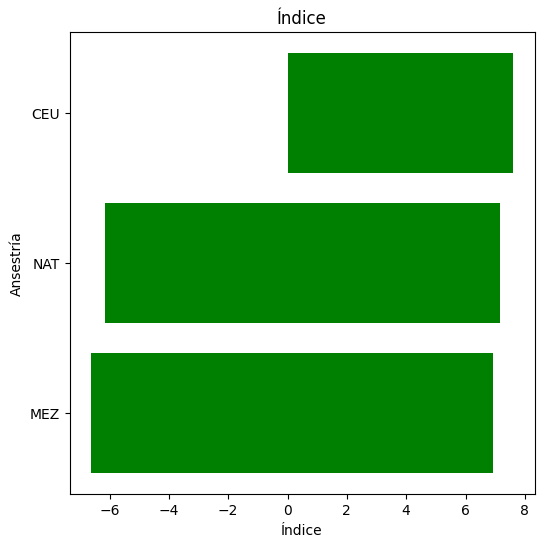

In [22]:
ash = ash.sort_values(by='índice', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(6, 6))
plt.barh(ash['POP'], ash['índice'], color="green")
plt.xlabel('Índice')
plt.ylabel('Ansestría')
plt.title('Índice')
plt.gca().invert_yaxis() # Invertir el eje Y para que el municipio con mayor marginalidad esté arriba
plt.show()

In [23]:
df_pca=pd.DataFrame(components).iloc[:, :2]

In [24]:
df_pca.columns=["PC1", "PC2"]

In [29]:
df_pca = df_pca.reset_index(drop=True)
anss= anss.reset_index(drop=True)

df_pca['POP'] = anss['POP']


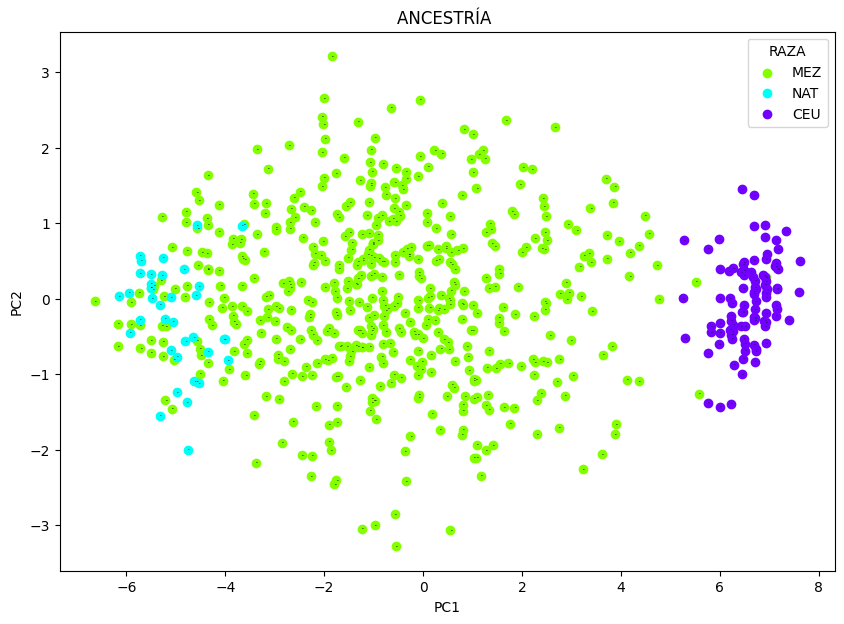

In [34]:
# Crear un diccionario de colores para cada entidad
raza = df_pca['POP'].unique()
colores = sns.color_palette("hsv", len(raza))
color_dict = {enti: colores[i] for i, enti in enumerate(raza)}

# Visualizar los resultados
plt.figure(figsize=(10, 7))

# Graficar los puntos con colores específicos por entidad
for enti in raza:
    subset = df_pca[df_pca['POP'] == enti]
    plt.scatter(subset['PC1'], subset['PC2'], c=[color_dict[enti]], label=enti)

# Añadir nombres de las entidades en el gráfico
for i, enti in enumerate(df_pca['POP']):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], enti, fontsize=1)

# Etiquetas y título
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ANCESTRÍA ')

# Mostrar la leyenda con las entidades y sus colores
plt.legend(title='RAZA')
plt.show()